# IPL Score prediction 

In this notebook we will look at the dataset and predict the first innings score in an IPL match using the data provided for the teams from the older seasons 

## Importing Basic Dependencies

Importing some basic modules. As we progress we will import more dependencies.

In [2]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore') #for ignoring the warnings

#For the plots to appear on the notebook 
%matplotlib inline


In [3]:
#Importing Dataset 

df = pd.read_csv("ipl.csv")


## Exploring the dataset 

In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df.shape

(76014, 15)

In [7]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [8]:
df.sum().isnull

<bound method Series.isnull of mid                                                        23460029
date              2008-04-182008-04-182008-04-182008-04-182008-0...
venue             M Chinnaswamy StadiumM Chinnaswamy StadiumM Ch...
bat_team          Kolkata Knight RidersKolkata Knight RidersKolk...
bowl_team         Royal Challengers BangaloreRoyal Challengers B...
batsman           SC GangulyBB McCullumBB McCullumBB McCullumBB ...
bowler            P KumarP KumarP KumarP KumarP KumarP KumarP Ku...
runs                                                        5692639
wickets                                                      183638
overs                                                        743650
runs_last_5                                                 2524914
wickets_last_5                                                85159
striker                                                     1897483
non-striker                                                  674190
total            

## Manipulating and cleaning the dataset

In [9]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [10]:
#Removing unwanted features

features_to_remove = ["mid", "batsman", "bowler", "striker", "non-striker"]

In [11]:
df.drop(labels = features_to_remove, axis =1, inplace = True )

print(f"Shape of dataset after removal of columns: {df.shape}")

Shape of dataset after removal of columns: (76014, 10)


In [16]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [17]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [18]:
#Keeping the consistent teams

consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [19]:
#Removing teams which are not required

df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))



After removing inconsistent teams: (53811, 10)


We require atleast data of 5 overs to make some predictions 

In [20]:
df = df[df["overs"]>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

After removing first 5 overs data: (40108, 10)


In [21]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [22]:
print(df["bat_team"].unique())
print(df["bowl_team"].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [23]:
#Checking missing values
df.isnull().sum()

date              0
venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [24]:
df.to_csv("iplupdate.csv", index = False)

In [25]:
df_update = pd.read_csv("iplupdate.csv", low_memory = False, parse_dates =["date"]) #converting date column to date type 

In [26]:
df_update.dtypes

date              datetime64[ns]
venue                     object
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

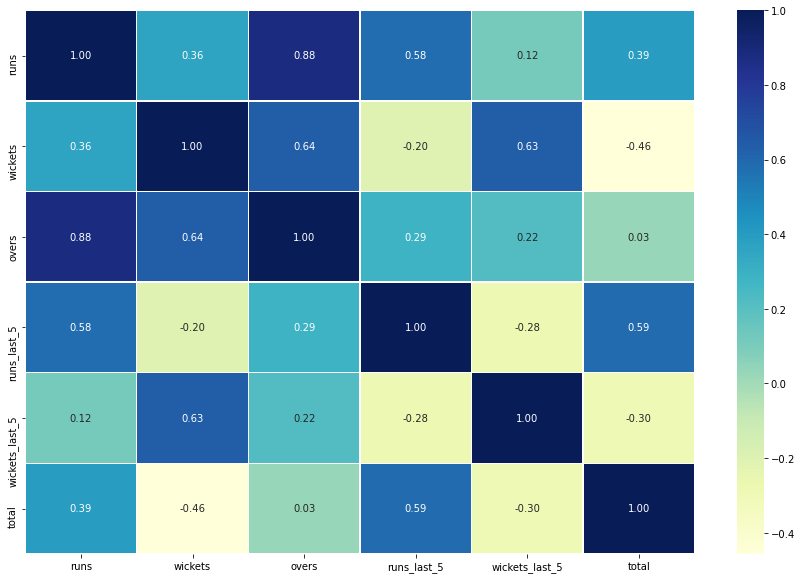

In [27]:
#Visualizing the correlation between different features using a heatmap

corr_matrix = df_update.corr()
fig,ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu");


## Data preprocessing 

In this section we will deal with the categorical features

In [28]:
encoded_df = pd.get_dummies(data = df_update, columns= ["bat_team", "bowl_team"])

In [29]:
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Rearranging the columns for splitting the data
encoded_df = encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5' ,'total']]

In [31]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
0,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
1,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
2,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
3,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
4,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [32]:
df_update.date.value_counts()

2011-04-22    193
2010-03-25    192
2015-04-25    191
2017-04-15    191
2013-04-27    191
             ... 
2014-05-02     73
2011-04-17     65
2008-05-16     64
2012-04-05     43
2015-05-13     31
Name: date, Length: 349, dtype: int64

## Modelling

In [33]:
#Splitting the data into train and test set for modelling 

np.random.seed(42)

X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column as we are done with the splitting 
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


## Ridge Regression 

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [35]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [36]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487922


In [37]:
prediction=ridge_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

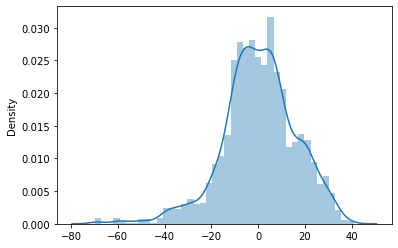

In [38]:
sns.distplot(y_test-prediction)

In [39]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005019
MSE: 251.03172964112733
RMSE: 15.843980864704656


## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [41]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8263789858526


Negative mean squared error is less in Lasso regression.

In [42]:
prediction = lasso_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

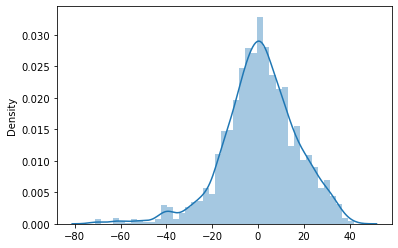

In [43]:
sns.distplot(y_test-prediction)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.214053814850246
MSE: 262.37973664007154
RMSE: 16.198139912967523


## Predictions

* Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)
* Model tested on data from IPL Season 10 ie: (2017)

In [45]:
def predict_score_ridge(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians',venue="Wankhede Stadium", overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]
    

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(ridge_regressor.predict(temp_array)[0])

In [46]:
def predict_score_lasso(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians',venue="Wankhede Stadium", overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]
    
  
  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(lasso_regressor.predict(temp_array)[0])

## Prediction 1

* Date: 30th March 2019
* IPL : Season 12
* Match number: 9
* Teams: Mumbai Indians vs. Kings XI Punjab
* First Innings final score: 176/7

In [47]:
total = predict_score_ridge(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab',venue="Wankhede Stadium",overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(total-10, total+5))

The final predicted score (range): 179 to 194


## Prediction 2

* Date: 11th April 2019
* IPL : Season 12
* Match number: 25
* Teams: Rajasthan Royals vs. Chennai Super Kings
* First Innings final score: 151/7

In [48]:
total = predict_score_lasso(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings',venue="Wankhede Stadium",overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(total-10, total+5))

The final predicted score (range): 132 to 147


## Prediction 3

* Date: 10th May 2019
* IPL : Season 12
* Match number: 59 (Eliminator)
* Teams: Delhi Daredevils vs. Chennai Super Kings
* First Innings final score: 147/9

In [49]:
total = predict_score_ridge(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(total-10, total+5))

The final predicted score (range): 137 to 152


## Prediction 4

* Date : 13th April 2021
* IPL  : Season 14
* Match number : 5
* Teams : Kolkata Knight Riders vs. Mumbai Indians
* First Innings score 

In [50]:
total = predict_score_ridge(batting_team='Mumbai Indians', bowling_team='Kolkata Knight Riders', overs=15.2, runs=115, wickets=4, runs_in_prev_5=25,wickets_in_prev_5=3)
print("The final predicted score (range): {} to {}".format(total-10, total+5))

The final predicted score (range): 145 to 160
